# HOUSING

In [267]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [268]:
def load_housing_data(housing_path=r'C:\Users\Pierre\Desktop\Bases de données\Machine Learning\Housing'):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)    #fonction renvoyant l'apercu de la dataframe

In [269]:
housing = load_housing_data()

In [270]:
housing.info() #permet d'afficher les infos sur la dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [271]:
# housing.head() permet de voir les 5 premières lignes du dataframe, ajouter le nombre voulu entre parenthèse
# housing.tail() 
# pd.set_option('display.max_rows', 25) permet de régler le nombre de lignes à afficher
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [272]:
housing.iloc[2908]

longitude             -119.04
latitude                35.37
housing_median_age       44.0
total_rooms            1618.0
total_bedrooms          310.0
population              667.0
households              300.0
median_income           2.875
median_house_value    82700.0
ocean_proximity        INLAND
Name: 2908, dtype: object

In [273]:
housing["ocean_proximity"].value_counts() #renvoie les différentes valeurs (et leur nombre d'occurences) de la colonne "ocean_proximity"

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [274]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


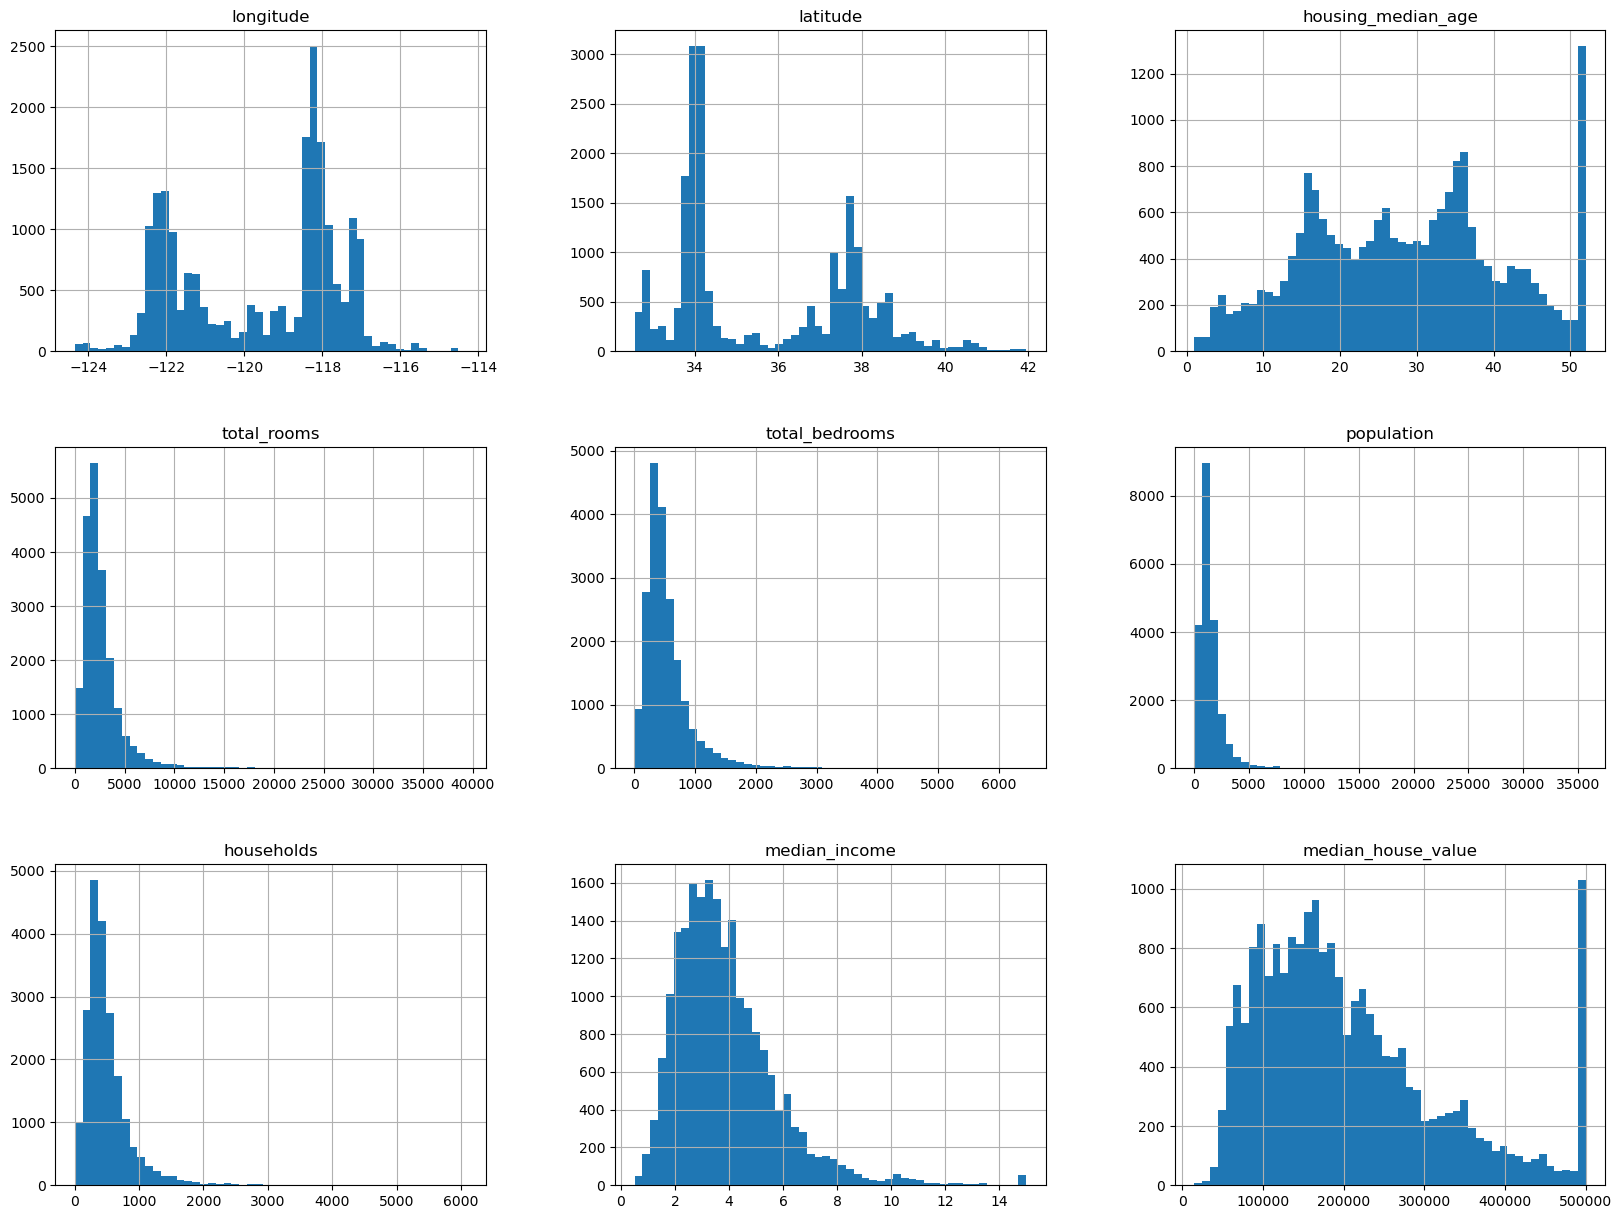

In [275]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Créer un ensemble test

### Approche direct, purement aléatoire (viable pour des dataframe très grandes)

In [276]:
from zlib import crc32 # zlib est une bibliothèque logicielle de compression de données

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

# La fonction CRC32 convertit une chaîne de longueur variable en une chaîne de 8 caractères qui est une représentation 
# textuelle de la valeur hexadécimale d'une séquence de 32 bits binaire.

def split_data_with_id_hash(data, test_ratio, id_column): #test ration correspond à la part des données qu'on teste (ici 20%)
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_,
    test_ratio)) # Pandas.apply allow the users to pass a function and apply it on every single value of the Pandas series
    return data.loc[~in_test_set], data.loc[in_test_set]

# int64 is a data type in numpy that can represent integer values from -9223372036854775808 to 9223372036854775807.

In [277]:
housing_with_id = housing.reset_index() # ajoute une colonne index
# housing_with_id

In [278]:
train_set, test_set = split_data_with_id_hash(housing_with_id,
0.2, "index")
# train_set

In [279]:
# test_set #(20% des données s'y situent)

In [280]:
from sklearn.model_selection import train_test_split #Scikit-Learn provides a few functions to split datasets
#into multiple subsets in various ways.

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
# train_set

### Approche plus "juste" (avec le moins de biais de simplification)

In [281]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5]) 
#pd.cut create an income category attribute with five categories (labeled from 1 to 5); category 1 ranges from 0 to 1.5 and so on
#housing

Text(0, 0.5, 'Number of districts')

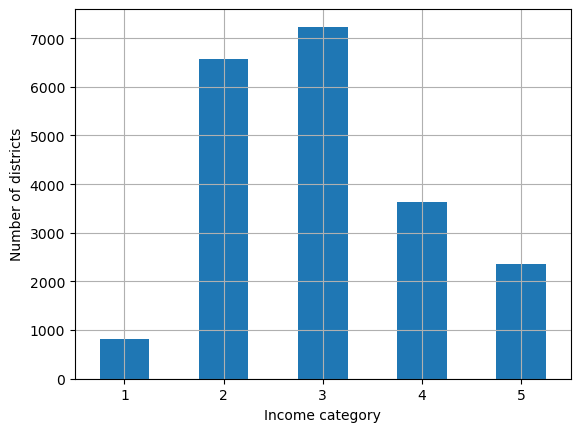

In [282]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True) #rot=0 (en degrès) met la numérotation abscisse à l'horizontale
plt.xlabel("Income category")
plt.ylabel("Number of districts")
#plt.show()

#### Stratified sampling based on the income category (using StratifiedeShuffleSplit)

In [283]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2,
random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n]) #generates 10 different stratified splits of the same dataset
    
#strat_train_set, strat_test_set = strat_splits[0]
#strat_splits[0]

#### Stratified sampling based on the income category (using train_test_split() function with the stratify argument)

In [284]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

strat_bias = strat_test_set["income_cat"].value_counts() / len(strat_test_set)
strat_bias

#type(strat_bias) = pandas.core.series.Series

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [285]:
data_prop = housing["income_cat"].value_counts() / len (housing)
data_prop

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [286]:
#Les proportions au sein des données tests sont similaires à celles des données initiales (ce qui est "bien")

#### Comparaison des biais de simplification

In [287]:
train_set_1, test_set_1 = train_test_split(housing, test_size=0.2, random_state=42)
random_bias = test_set_1["income_cat"].value_counts() / len(test_set_1)
random_bias

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64

In [288]:
sum_up = pd.concat([data_prop, random_bias, strat_bias], axis = 1)
sum_up = sum_up.sort_index(axis=0, ascending=True)
sum_up.columns = {'Data_prop', 'Random_bias', 'Strat_bias'}
sum_up

,Random_bias,Data_prop,Strat_bias
1,0.039826,0.040213,0.039971
2,0.318847,0.324370,0.318798
3,0.350581,0.358527,0.350533
4,0.176308,0.167393,0.176357
5,0.114438,0.109496,0.114341


In [289]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Explorer et visualiser les données

In [290]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

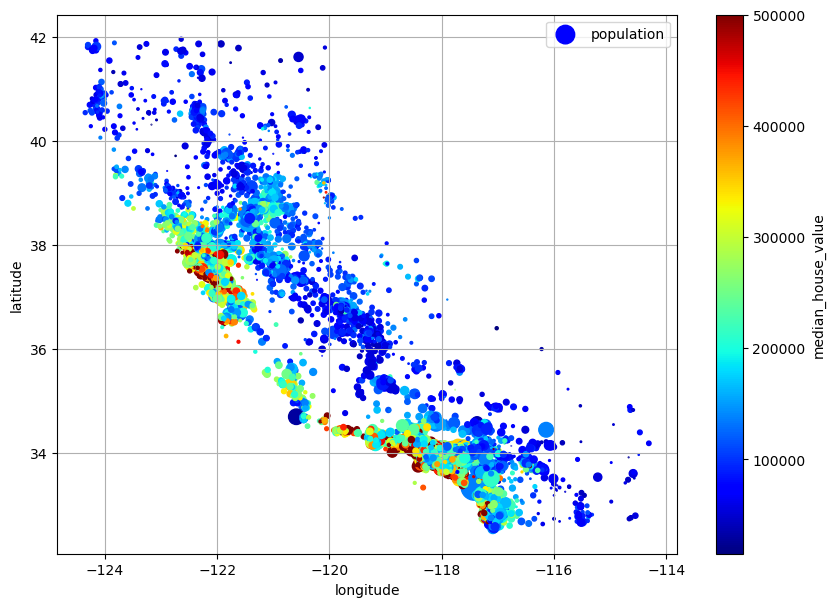

In [291]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=housing["population"]/100, label="population", 
            c= "median_house_value", cmap = "jet", colorbar= True, legend=True, sharex= False, figsize=(10, 7) ) 
#alpha pour voir mieux les densités
#radius of each circle represents the district’s population (option s)
#and the color represents the price (option c)
#predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices)

In [292]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\Pierre\AppData\Local\Temp\ipykernel_4580\826279322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

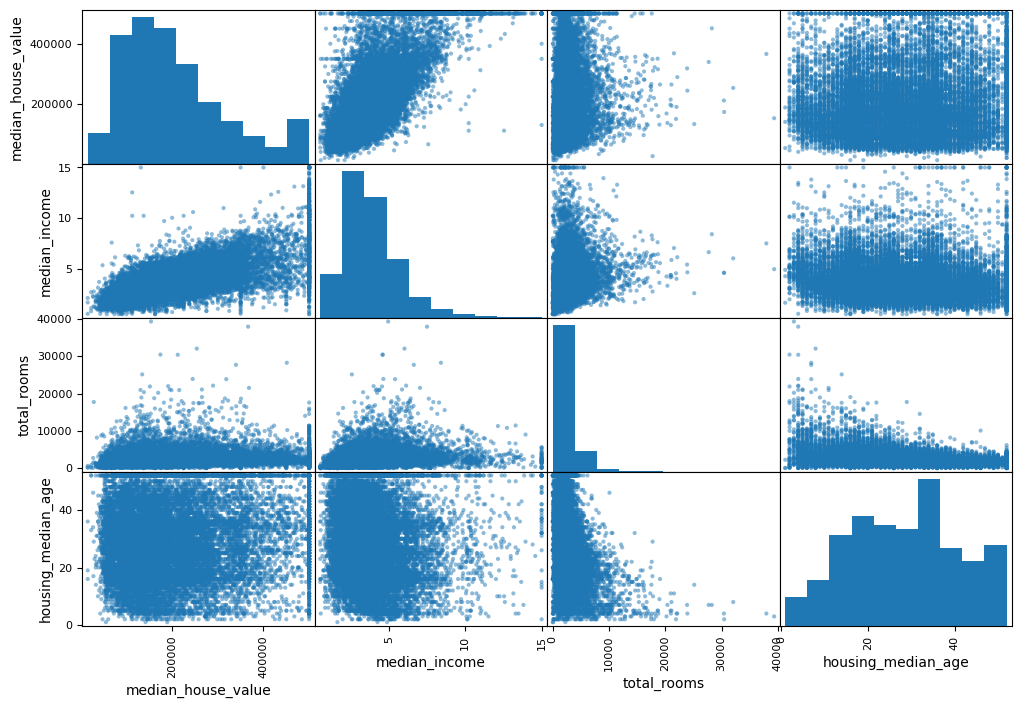

In [293]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income",
"total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

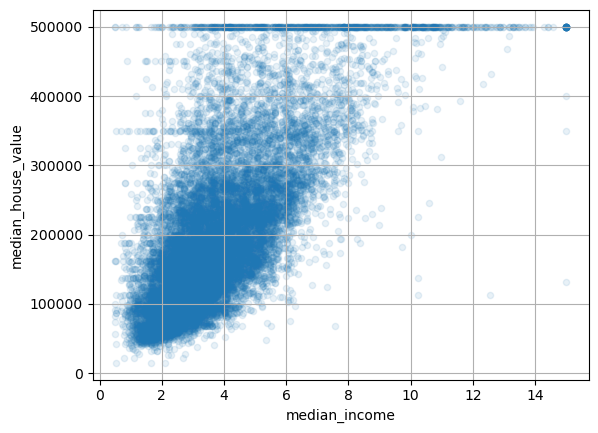

In [294]:
housing.plot(kind="scatter", x="median_income",y="median_house_value", alpha=0.1, grid=True)

In [295]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] /housing["households"]

In [296]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\Pierre\AppData\Local\Temp\ipykernel_4580\826279322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.687151
rooms_per_house       0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
people_per_house     -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bedrooms_ratio       -0.259952
Name: median_house_value, dtype: float64

## Nettoyer / préparer les données

In [297]:
housing = strat_train_set.drop("median_house_value", axis=1) #retire la colonne de prédiction
housing_labels = strat_train_set["median_house_value"].copy()

In [298]:
from sklearn.impute import SimpleImputer #SimpleImputer permet de remplacer des données manquantes par des valeurs 
#(ici la médiane de chaque colonne, c'est pourquoi il faut garder que les valeurs numériques du dataframe)
imputer = SimpleImputer(strategy="median") 
housing_num = housing.select_dtypes(include=[np.number]) #selection les données contentant des nombres
imputer.fit(housing_num) #applique l'impute

SimpleImputer(strategy='median')

In [299]:
imputer.statistics_ , housing_num.median().values

(array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
        1164.     ,  408.     ,    3.54155]),
 array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
        1164.     ,  408.     ,    3.54155]))

In [300]:
X = imputer.transform(housing_num) #Missing values can also be replaced with:
#(strategy="mean"), or with the most frequent value
#(strategy="most_frequent"), or with a constant value
#(strategy="constant", fill_value=…). The last two strategies support non-numerical data.
X #il s'agit d'un np.array()

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [301]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)#convertir un array en pd.DataFrame
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


### Handling Text and Categorical Attributes

In [302]:
housing_cat = housing[["ocean_proximity"]]

In [303]:
from sklearn.preprocessing import OrdinalEncoder #permet d'associer des valeurs numériques à des catégories
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:8], ordinal_encoder.categories_

(array([[1.],
        [4.],
        [1.],
        [4.],
        [0.],
        [3.],
        [0.],
        [0.]]),
 [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
        dtype=object)])

In [304]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat) #By default, the output of a OneHotEncoder is a SciPy sparse matrix
#très utile pour des matrices remplies de 0

In [305]:
housing_cat_1hot.toarray() #transfome la matrix en np.array, les lignes sont les données et les colonnes sont les catégories
#np.shape(housing_cat_1hot.toarray())

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [306]:
#When you fit any Scikit-Learn estimator using a DataFrame, the estimator
#stores the column names in the feature_names_in_ attribute. Scikit-
#Learn then ensures that any DataFrame fed to this estimator after that (e.g.,
#to transform() or predict()) has the same column names.
#Transformers also provide a get_feature_names_out() method that
#you can use to build a DataFrame around the transformer’s output
cat_encoder.feature_names_in_, cat_encoder.get_feature_names_out()

(array(['ocean_proximity'], dtype=object),
 array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
        'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
        'ocean_proximity_NEAR OCEAN'], dtype=object))

### Feature Scaling and Transformation

#### min-max scaling (normalization)

In [307]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1, 1)) #par défaut dans [0,1], réalise (donnée-min_value)/( max_value-min _value)
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)
housing_num_min_max_scaled

array([[-0.42430279,  0.27098831,  0.09803922, ..., -0.87477228,
        -0.73711725, -0.76914801],
       [ 0.41832669, -0.88310308, -0.76470588, ..., -0.88721657,
        -0.71396565, -0.19485248],
       [ 0.05776892, -0.39851222,  0.68627451, ..., -0.96277923,
        -0.88872293, -0.67240452],
       ...,
       [-0.6752988 ,  0.25398512,  0.84313725, ..., -0.9744948 ,
        -0.93651979, -0.63037751],
       [-0.67131474,  0.22635494, -0.49019608, ..., -0.93245326,
        -0.81366692, -0.49014496],
       [-0.55976096,  0.57917109,  0.01960784, ..., -0.96513355,
        -0.92718447, -0.63697052]])

#### standardization

In [308]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler() #donnée - min_value/ écart_type
housing_num_std_scaled = std_scaler.fit_transform(housing_num) 
housing_num_std_scaled

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

In [309]:
#So before you scale the feature, you should first transform it to shrink the heavy tail, and if 
# possible to make the distribution roughly symmetrical

##### Power law distrib

<Axes: >

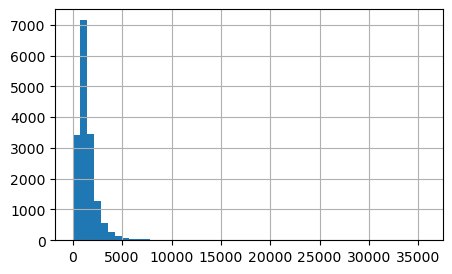

In [310]:
housing["population"].hist(bins=50, figsize=(5,3))

<Axes: >

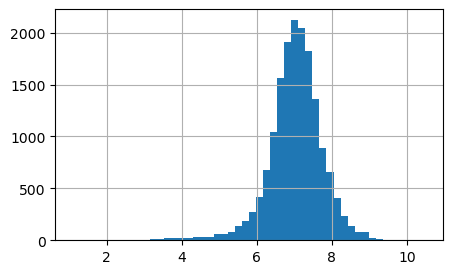

In [311]:
#on prend les valeurs en logarithme pour obtenir une cloche
np.log(housing["population"]).hist(bins=50, figsize=(5,3))

#### Bucketizing

In [312]:
# Another approach to transforming multimodal distributions is to add a feature for each of the modes (at least the main ones),
# representing the similarity between the housing median age and that particular mode. The similarity measure is typically 
# computed using a radial basis function(RBF)—any function that depends only on the distance between the input value and a
# fixed point. The most commonly used RBF is the Gaussian RBF, whose output value decays exponentially as the input value moves
# away from the fixed point.

In [313]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)
age_simil_35

array([[2.73237224e-02],
       [8.93948745e-35],
       [3.03539138e-04],
       ...,
       [4.57533877e-08],
       [7.04065961e-20],
       [1.66155727e-03]])

In [314]:
from sklearn.linear_model import LinearRegression
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())
model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5] # pretend this is new data
scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)
housing[["median_income"]].iloc[:5]

,median_income
12655,2.1736
15502,6.3373
2908,2.8750
14053,2.2264
20496,4.4964


In [315]:
predictions_df = pd.DataFrame(predictions, columns= ["prediction"],index=housing[["median_income"]].iloc[:5].index)

In [316]:
housing[["median_income"]].iloc[:5].merge(predictions_df, how='inner', left_index=True, right_index=True)

,median_income,prediction
12655,2.1736,135958.758054
15502,6.3373,309735.008975
2908,2.8750,165232.399862
14053,2.2264,138162.419712
20496,4.4964,232903.176633


In [317]:
#a simpler option is to use a TransformedTargetRegressor
from sklearn.compose import TransformedTargetRegressor
model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

In [318]:
predictions

array([135958.75805364, 309735.008975  , 165232.3998617 , 138162.41971241,
       232903.1766333 ])

### Custom Transformers

In [319]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] /X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [320]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True): # no *args or **kwargs!
        self.with_mean = with_mean
    def fit(self, X, y=None): # y is required even though we don't use it
        X = check_array(X) # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1] # every estimator stores this in fit()
        return self # always return self!
    def transform(self, X):
        check_is_fitted(self) # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [344]:
from sklearn.cluster import KMeans
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state, n_init=10)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self # always return self!
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [345]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1.,random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude","longitude"]], sample_weight=housing_labels)
similarities[:3].round(2)

array([[0.  , 0.49, 0.31, 0.  , 0.  , 0.  , 0.  , 0.85, 0.  , 0.16],
       [0.4 , 0.  , 0.  , 0.  , 0.  , 0.95, 0.11, 0.  , 0.  , 0.  ],
       [0.02, 0.  , 0.  , 0.15, 0.  , 0.  , 0.12, 0.  , 0.37, 0.  ]])

### Transformation pipelines

In [346]:
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([("impute", SimpleImputer(strategy="median")),("standardize", StandardScaler()),])
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [347]:
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy="median"),StandardScaler())
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [348]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-0.94,  1.35,  0.03,  0.58,  0.64,  0.73,  0.56, -0.89],
       [ 1.17, -1.19, -1.72,  1.26,  0.78,  0.53,  0.72,  1.29]])

In [349]:
#on peut utiliser des transformations sur les colonnes via ColumnTransformer
from sklearn.compose import ColumnTransformer
num_attribs = ["longitude", "latitude", "housing_median_age",
"total_rooms","total_bedrooms", "population", "households","median_income"]
cat_attribs = ["ocean_proximity"]
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                             OneHotEncoder(handle_unknown="ignore"))
preprocessing = ColumnTransformer([("num", num_pipeline, num_attribs),
                                   ("cat", cat_pipeline, cat_attribs),
                                  ])

In [350]:
from sklearn.compose import make_column_selector, make_column_transformer
preprocessing = make_column_transformer((num_pipeline,
                                         make_column_selector(dtype_include=np.number)),
                                        (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [351]:
housing_prepared = preprocessing.fit_transform(housing)

In [352]:
preprocessing.get_feature_names_out()

array(['pipeline-1__longitude', 'pipeline-1__latitude',
       'pipeline-1__housing_median_age', 'pipeline-1__total_rooms',
       'pipeline-1__total_bedrooms', 'pipeline-1__population',
       'pipeline-1__households', 'pipeline-1__median_income',
       'pipeline-2__ocean_proximity_<1H OCEAN',
       'pipeline-2__ocean_proximity_INLAND',
       'pipeline-2__ocean_proximity_ISLAND',
       'pipeline-2__ocean_proximity_NEAR BAY',
       'pipeline-2__ocean_proximity_NEAR OCEAN'], dtype=object)

In [353]:
df_housing_prepared = pd.DataFrame(housing_prepared,
                                   columns=preprocessing.get_feature_names_out(),
                                   index=housing_num.index,
                                  )
df_housing_prepared.head()

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.0,1.0,0.0,0.0,0.0
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.0,0.0,0.0,0.0,1.0
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,0.0,1.0,0.0,0.0,0.0
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,0.0,0.0,0.0,0.0,1.0
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,1.0,0.0,0.0,0.0,0.0


In [354]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]
def ratio_name(function_transformer, feature_names_in):
    return ["ratio"] # feature names out
def ratio_pipeline():
    return make_pipeline(SimpleImputer(strategy="median"), FunctionTransformer(column_ratio,
        feature_names_out=ratio_name),StandardScaler())
log_pipeline = make_pipeline(SimpleImputer(strategy="median"), FunctionTransformer(np.log, feature_names_out="one-to-one"),
        StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
preprocessing = ColumnTransformer([("bedrooms", ratio_pipeline(), ["total_bedrooms","total_rooms"]), 
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)), ],
remainder=default_num_pipeline) # one column remaining: housing_median_age

In [355]:
housing_prepared = preprocessing.fit_transform(housing)
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

## Select and Train a Model
### Train and Evaluate on the Training Set

In [356]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2), housing_labels.iloc[:5].values

(array([ 71100., 289400., 180200., 190100., 277000.]),
 array([ 72100., 279600.,  82700., 112500., 238300.]))

In [357]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(housing_labels,
housing_predictions, squared=False)
lin_rmse

69206.78692511137

In [358]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels,
                               housing_predictions,
                               squared=False)

tree_rmse

0.0

### Better Evaluation Using Cross-Validation

In [359]:
from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
scoring="neg_root_mean_squared_error", cv=10)

In [360]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     67130.179601
std       2739.852690
min      62414.452955
25%      66279.645501
50%      67577.222842
75%      68245.416450
max      71549.880237
dtype: float64

In [362]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing,
                                housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()

count       10.000000
mean     47328.317269
std       2527.589595
min      43625.026527
25%      45224.777860
50%      47291.793601
75%      49073.526315
max      51265.623767
dtype: float64

## Fine-Tune Your Model
### Grid Search

In [364]:
from sklearn.model_selection import GridSearchCV
full_pipeline = Pipeline([("preprocessing", preprocessing),
                          ("random_forest", RandomForestRegressor(random_state=42)),])
param_grid = [{'preprocessing__geo__n_clusters': [5, 8, 10],
               'random_forest__max_features': [4, 6, 8]},
              {'preprocessing__geo__n_clusters': [10, 15],
               'random_forest__max_features': [6, 8, 10]},]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000028E76E8C610>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [365]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [366]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,16.923530,0.250584,0.295442,0.003728,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-43295.717762,-44378.454699,-45349.625988,-44341.266150,838.916758,1
13,21.936375,1.084012,0.310617,0.021066,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-43557.189415,-44711.450415,-45474.974471,-44581.204767,788.330653,2
14,25.739711,0.257867,0.303926,0.005425,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",-44078.487161,-45074.736556,-46287.657774,-45146.960497,903.334904,3
7,17.158586,0.681425,0.323209,0.011550,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44393.036111,-44981.168270,-46093.203255,-45155.802545,704.989327,4
9,16.471637,0.263025,0.303398,0.003839,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44393.036111,-44981.168270,-46093.203255,-45155.802545,704.989327,4


### Randomized Search